# Precios en tiempos de cólera

#### El salario cubano frente al costo de la canasta básica en MiPymes minoristas

En Cuba, el **precio** es sinónimo de decisión: determina qué puede comprar una persona con su salario en un mercado donde los precios suben sin límite y coexisten **dos tasas de cambio**. Entonces surge la pregunta: **¿Puede un cubano de la clase trabajadora adquirir los alimentos básicos?**

## Introducción

## Fuentes de datos

Para el desarrollo del análisis se realizó la recopilación de información de **30 MiPymes minorista**, considerando un conjunto mínimo de 10 productos de consumo básico (alimentos). A partir de esta información se obtuvieron precios reales del mercado local, como fuente principal.

Como complemento, se utilizaron fuentes de información externas relacionadas con el **salario mensual** del trabajador cubano y las **tasas de cambio** vigentes, con el objetivo de apreciar los precios y permitir comparaciones económicas. También, se realizó la extracción de precios de productos en páginas web que operan en divisa.

### Bibliotecas:

In [1]:
from m_tools import *
from m_normalize import *
from m_charts import *

In [2]:
print(f'Cantidad de MiPymes: {data_count}')

Cantidad de MiPymes: 5


In [3]:
CountProducts2()

{'tic toc': 21,
 "ale's supermarket": 21,
 "bodegón d'k": 36,
 'la nenita': 15,
 'bodegón, las duras': 15}

## Canasta:

In [4]:
Basket('basket.json')

## Chart 1: Precio promedio por producto

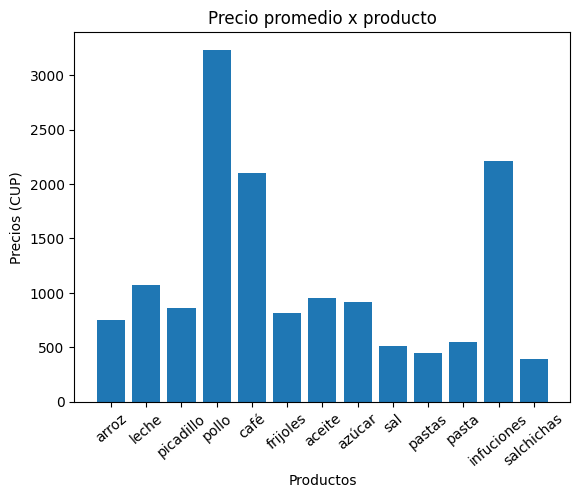

In [5]:
ChartAverageProducts()

## Chart 2: Precio promedio por MiPyme

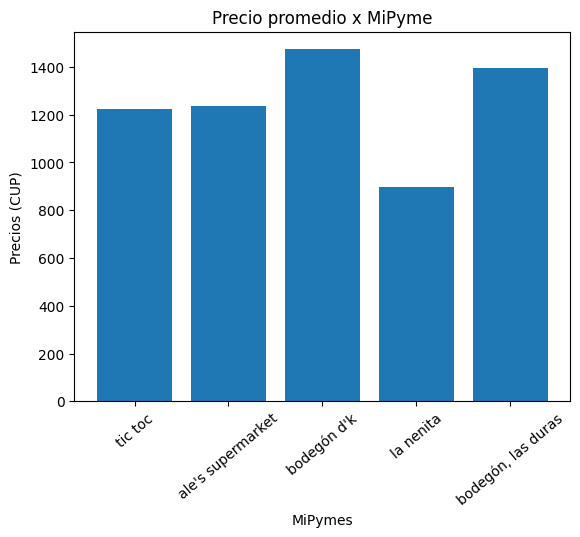

In [6]:
ChartAveragePyme()

## Chart 3: Comparación de Canasta/Salario

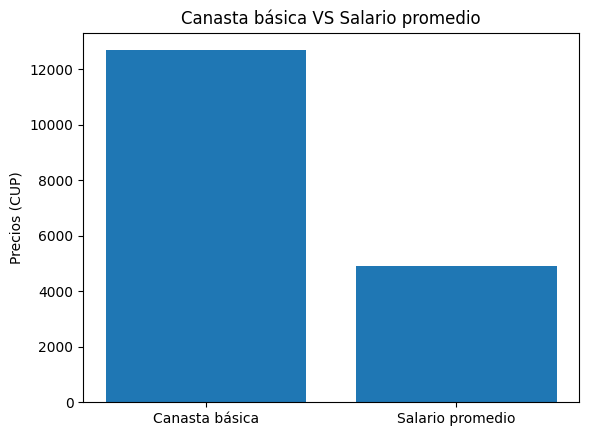

In [7]:
ChartCostBasket()

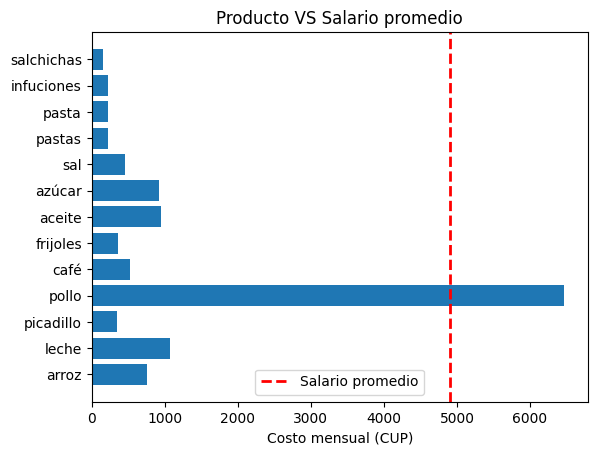

In [8]:
ChartCostBasket2()